In [1]:
#File: analysizing_exoplanet_data.ipynb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df = pd.read_csv("exoplanet_data.csv", comment = "#")
df.shape # (197, 84) the data is 197 rows by 84 rows
print(df.columns)
# pl_rade, pl_orbeccen, st_tefflim, st_rad, pl_tandur

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 

Planet Name: Planet name most commonly used in the literature

Host Name: Stellar name most commonly used in the literature

Discovery Method: how the planet was first identified

Spectral Type: how the planet's star is classified based on Morgan-Keenan system

Equilibrium Temperature [K]: temperature of the planet assuming black body radiation from either the star or if the planet was a black body

Planet Mass: Mass of the planet accounting  for the inclination of the planet

In [40]:
selected_columns = ['pl_name', 'hostname', 'discoverymethod', 'st_spectype', 'pl_eqt', 'pl_bmassj']
df_reduced = df[selected_columns].copy()
df_reduced = df_reduced.dropna(axis=0)
df_reduced.shape #(85, 6) 197 rows, 6 columns
print(df_reduced.head())
print(df_reduced.tail())

    pl_name hostname  discoverymethod st_spectype  pl_eqt  pl_bmassj
1  DMPP-1 b   DMPP-1  Radial Velocity        F8 V   877.0   0.076362
2  DMPP-1 c   DMPP-1  Radial Velocity        F8 V  1239.0   0.030205
3  DMPP-1 d   DMPP-1  Radial Velocity        F8 V  1632.0   0.010540
4  DMPP-1 e   DMPP-1  Radial Velocity        F8 V  1314.0   0.012994
5  DMPP-2 b   DMPP-2  Radial Velocity        F5 V  1000.0   0.437000
         pl_name   hostname  discoverymethod st_spectype  pl_eqt  pl_bmassj
192   WASP-190 b   WASP-190          Transit     F6 IV-V  1500.0      1.000
193   WASP-192 b   WASP-192          Transit        G0 V  1620.0      2.300
194       XO-7 b       XO-7          Transit        G0 V  1743.0      0.709
195    bet Pic c    bet Pic  Radial Velocity         A5V  1250.0     10.139
196  eps Ind A b  eps Ind A  Radial Velocity        K5 V   275.0      6.310


In [41]:
print(df_reduced['discoverymethod'].value_counts()) #amounts and methods in print statement

discoverymethod
Transit            62
Radial Velocity    19
Imaging             4
Name: count, dtype: int64


Transit: The planet passes in front of the star, leading to a drop in intensity

Radial Velocity: this method detects whether the host star has any variations in its radial velocity due to the planet

Microlensing: The planet acted as a lens in a microlensing event, meaning it warped the light behind it

Imaging: whether or not the planet was directly observed through imaging

Transit Timing Variations: planet is detected by looking at the fluctuations of an already known transit system

Eclipse Timing Variations: This method determines if a planet created a variation in the eclipse timing of an already eclipsing binary

Disk Kinematics: detection through the inferred kinematics of the disk of its host star

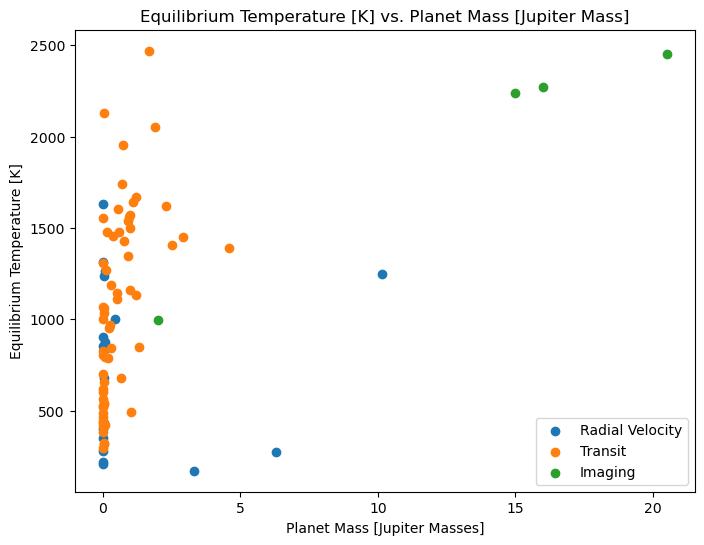

In [42]:
plt.figure(figsize =(8,6))

method_list = df_reduced['discoverymethod'].unique()

for method in method_list:
    df_subset = df_reduced[df_reduced['discoverymethod'] == method]
    plt.scatter(df_subset['pl_bmassj'], df_subset['pl_eqt'], label = f'{method}')

plt.title("Equilibrium Temperature [K] vs. Planet Mass [Jupiter Mass]")
plt.xlabel("Planet Mass [Jupiter Masses]")
plt.ylabel("Equilibrium Temperature [K]")
plt.legend()
plt.show()

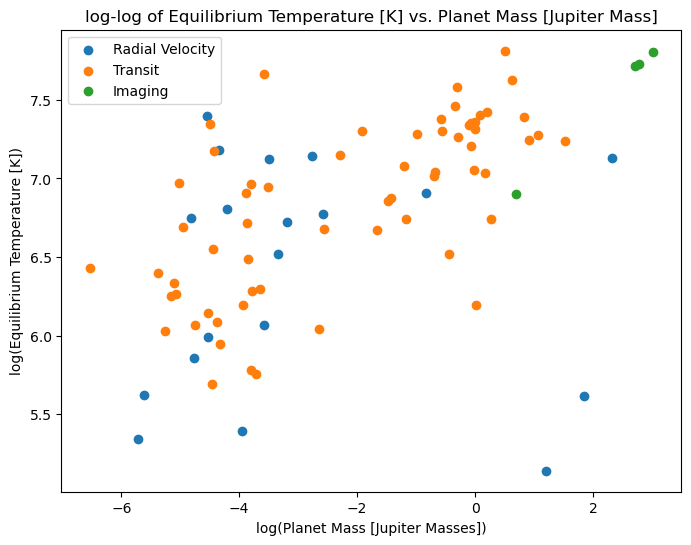

In [43]:
plt.figure(figsize =(8,6))

method_list = df_reduced['discoverymethod'].unique()

for method in method_list:
    df_subset = df_reduced[df_reduced['discoverymethod'] == method]
    plt.scatter(np.log(df_subset['pl_bmassj']), np.log(df_subset['pl_eqt']), label = f'{method}')

plt.title("log-log of Equilibrium Temperature [K] vs. Planet Mass [Jupiter Mass]")
plt.xlabel("log(Planet Mass [Jupiter Masses])")
plt.ylabel("log(Equilibrium Temperature [K])")
plt.legend()
plt.show()

#Based on this plot planets found by imaging are more likely to be massive

In [70]:
mass_filtered = df_reduced[(df_reduced['pl_bmassj'] > 5)]
special = mass_filtered['pl_eqt'].argmin()
print(special)
# print(df_reduced)
special_mass = np.log(df_reduced.iloc[special,5])
special_temp = np.log(df_reduced.iloc[special,4])                

print(mass_filtered.iloc[special, :])

"""
1. eps Ind A b
2. its at index 196 of the original dataframe
3. the eq T is 275 K
4. 6.31
5. This is an orangish star slightly smaller than the sun
"""

4
pl_name                eps Ind A b
hostname                 eps Ind A
discoverymethod    Radial Velocity
st_spectype                   K5 V
pl_eqt                       275.0
pl_bmassj                     6.31
Name: 196, dtype: object


'\n1. eps Ind A b\n2. its at index 196 of the original dataframe\n3. the eq T is 275 K\n4. 6.31\n5. This is an orangish star slightly smaller than the sun\n'

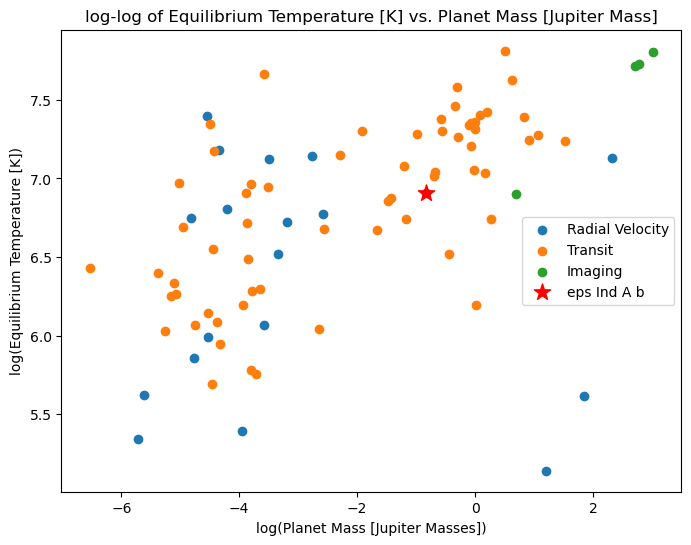

In [76]:
plt.figure(figsize =(8,6))

method_list = df_reduced['discoverymethod'].unique()

for method in method_list:
    df_subset = df_reduced[df_reduced['discoverymethod'] == method]
    plt.scatter(np.log(df_subset['pl_bmassj']), np.log(df_subset['pl_eqt']), label = f'{method}')
plt.scatter(special_mass, special_temp, c = "Red", marker='*', label = 'eps Ind A b', s = 150)
plt.title("log-log of Equilibrium Temperature [K] vs. Planet Mass [Jupiter Mass]")
plt.xlabel("log(Planet Mass [Jupiter Masses])")
plt.ylabel("log(Equilibrium Temperature [K])")
plt.legend()
plt.show()


- A temperate super-Jupiter imaged with JWST in the mid-infrared
- The abstract essentially says there was a sun with certain things and they used JWST to confirm their suspicions about the planet
- Yes my answer matched the answer
- the special part about this planet is both the size buit also the luminosity being so bright
- the paper claimed a mass of 6.31 and temp of 275 which matches identically with my results